# Active learning using SVM : 
2(b.) (i.) 

In [1]:
import pandas as pd
dataset = pd.read_csv('/Users/divyatmika/Desktop/Di/data_banknote_authentication.csv')

In [2]:
print("No of rows:")
print(dataset.shape[0])
print("No of columns:")
print(dataset.shape[1])

No of rows:
1372
No of columns:
5


In [3]:
#classes
dataset.groupby( ['Class'] ).count()

,A,B,C,D
Class,,,,
0,762,762,762,762
1,610,610,610,610


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(dataset, test_size=0.344,random_state=1)


In [6]:
train.shape

(900, 5)

In [7]:
test.shape

(472, 5)

# 2b(i.) Train SVM with GridSearchCV for penalty parameters for 90 SVMs and calculate 50 errors for 90 SVMs. No Replacement!

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np
params_dict = {"C": np.logspace(-2, 10, 10)}

In [10]:
params_dict

{'C': array([  1.00000000e-02,   2.15443469e-01,   4.64158883e+00,
          1.00000000e+02,   2.15443469e+03,   4.64158883e+04,
          1.00000000e+06,   2.15443469e+07,   4.64158883e+08,
          1.00000000e+10])}

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
#10-fold Cross Validation
kf = KFold(n_splits=10)
linearSVC = LinearSVC(penalty='l1', random_state=0,loss='squared_hinge', dual=False)
l1SVC = GridSearchCV(linearSVC, param_grid=params_dict, cv=kf)


In [12]:
l1SVC

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-02,   2.15443e-01,   4.64159e+00,   1.00000e+02,
         2.15443e+03,   4.64159e+04,   1.00000e+06,   2.15443e+07,
         4.64159e+08,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
iter_error = {}
for i in range(1,51,1):
    error = []
    random_val = randint(1,42)
    k_iter = 0
    train, test = train_test_split(dataset, test_size=0.344,random_state=random_val)
    #split predictors
    X_train = train.drop(columns = 'Class')
    Y_train = train[['Class']]
    X_test = test.drop(columns = 'Class')
    Y_test = test[['Class']]
    #standradize the attributes 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    j = 0
    while(j < 91):
        X_train_iter = X_train[:k_iter+10]
        Y_train_iter = Y_train[:k_iter+10]
        l1SVC.fit(X_train_iter, Y_train_iter)
        y_pred = l1SVC.predict(X_test)
        error.append(1-accuracy_score(y_pred,Y_test))
        k_iter = k_iter + 10
        j = j + 1 
    iter_error.update({i:error})
    
    
    
    
    
    
    
    

In [69]:
iter_error

{1: [0.28177966101694918,
  0.20127118644067798,
  0.17796610169491522,
  0.18220338983050843,
  0.18220338983050843,
  0.18220338983050843,
  0.18220338983050843,
  0.18644067796610164,
  0.19279661016949157,
  0.13347457627118642,
  0.13347457627118642,
  0.19279661016949157,
  0.19491525423728817,
  0.19491525423728817,
  0.19491525423728817,
  0.19491525423728817,
  0.19279661016949157,
  0.19067796610169496,
  0.19067796610169496,
  0.19067796610169496,
  0.19067796610169496,
  0.19067796610169496,
  0.19067796610169496,
  0.18855932203389836,
  0.18855932203389836,
  0.18855932203389836,
  0.14406779661016944,
  0.14194915254237284,
  0.13983050847457623,
  0.15254237288135597,
  0.16101694915254239,
  0.16101694915254239,
  0.16101694915254239,
  0.16101694915254239,
  0.16101694915254239,
  0.16101694915254239,
  0.15677966101694918,
  0.15889830508474578,
  0.15889830508474578,
  0.15889830508474578,
  0.16101694915254239,
  0.16101694915254239,
  0.16101694915254239,
  0.1610

In [70]:
len(iter_error)

50

# b(ii.) Active Learning

In [95]:
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
iter_error_active = {}
for i in range(1,51,1):
    error = []
    random_val = randint(1,42)
    k_iter = 0
    train, test = train_test_split(dataset, test_size=0.344,random_state=random_val)
    #split predictors
    X_train_active = train.drop(columns = 'Class')
    Y_train_active = train[['Class']]
    X_test = test.drop(columns = 'Class')
    Y_test = test[['Class']]
    #standradize the attributes 
    scaler = StandardScaler()
    X_train_active = scaler.fit_transform(X_train_active)
    X_train_iter_active = X_train_active[:10]
    Y_train_iter_active = Y_train_active[:10]
    j = 0
    while(j < 91):
        l1SVC.fit(X_train_iter_active, Y_train_iter_active)
        y_pred_active = l1SVC.predict(X_test)
        error.append(1-accuracy_score(y_pred_active,Y_test))
        #find the distances from the hyperplane 
        dists = l1SVC.decision_function(X_train_active)
        absdists = np.abs(dists)
        #find the closest 10 points 
        ans = absdists.argsort()[:10] 
        #find those X 
        closest_points_X = X_train_active[ans] 
        #append to the traning set X 
        closest_points_Y = Y_train_active.iloc[ans]
        #check if the datapoints belong to the same class;
        #if yes, SELECT THE DATA POINTS RANDOMLY 
        X_train_iter_active = np.concatenate((X_train_iter_active,closest_points_X))
        Y_train_iter_active = pd.concat([Y_train_iter_active, closest_points_Y])
        n_classes = Y_train_iter_active.groupby('Class').size()
        if(len(n_classes)==1):
            ans = []
            num = 10
            for x in range(num):
                ans.append(randint(10, 900))
            closest_points_X = X_train_active[ans] 
            closest_points_Y = Y_train_active.iloc[ans]
            n_classes_i = closest_points_Y.groupby('Class').size()
            X_train_iter_active = np.concatenate((X_train_iter_active,closest_points_X))
            Y_train_iter_active = pd.concat([Y_train_iter_active, closest_points_Y])
        j = j + 1 
    iter_error_active.update({i:error})
    

In [130]:
iter_error_active

{1: [0.2521186440677966,
  0.11016949152542377,
  0.18432203389830504,
  0.21398305084745761,
  0.22245762711864403,
  0.21186440677966101,
  0.21610169491525422,
  0.22457627118644063,
  0.21822033898305082,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22245762711864403,
  0.22245762711864403,
  0.22245762711864403,
  0.22245762711864403,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457627118644063,
  0.22457

In [131]:
len(iter_error_active)

50

# c. Graph

In [174]:
average_error_active = {}
val_svm_i = 0
for key,value in iter_error_active.items():
    x = value
    training_instance = 10
    for i in range(len(x)):
        val_svm_i = x[i]
        if training_instance in average_error_active:
            val_svm_i_cum = val_svm_i + average_error_active.get(training_instance)
            average_error_active.update({training_instance:val_svm_i_cum})
        else:
            average_error_active.update({training_instance:val_svm_i})
        training_instance  = training_instance + 10
    

In [22]:
for key,value in average_error_active.items():
    n_train = key
    average_error_active.update({key:(value/n_train)})

In [23]:
average_error_active 

{10: 0.9514830508474577,
 20: 0.4920550847457627,
 30: 0.35254237288135587,
 40: 0.2768538135593221,
 50: 0.22033898305084743,
 60: 0.17874293785310733,
 70: 0.15199757869249392,
 80: 0.13395127118644068,
 90: 0.11913841807909607,
 100: 0.10817796610169493,
 110: 0.09791987673343608,
 120: 0.08990112994350284,
 130: 0.08292046936114736,
 140: 0.07681598062953995,
 150: 0.07194915254237289,
 160: 0.06731991525423728,
 170: 0.06323529411764708,
 180: 0.05986346516007534,
 190: 0.056612399643175736,
 200: 0.0538135593220339,
 210: 0.05114003228410009,
 220: 0.04885400616332821,
 230: 0.046914148857774514,
 240: 0.044844632768361585,
 250: 0.04305932203389832,
 260: 0.041549869621903525,
 270: 0.03968141870684245,
 280: 0.038672820823244566,
 290: 0.037331969608416136,
 300: 0.03598163841807911,
 310: 0.03493712411153637,
 320: 0.033772510593220346,
 330: 0.03285824345146381,
 340: 0.03177342971086742,
 350: 0.03082929782082325,
 360: 0.030037664783427506,
 370: 0.029168575355016043,
 380:

In [183]:
average_error_passive = {}
val_svm_i = 0
for key,value in iter_error.items():
    x = value
    training_instance = 10
    for i in range(len(x)):
        val_svm_i = x[i]
        if training_instance in average_error_passive:
            val_svm_i_cum = val_svm_i + average_error_passive.get(training_instance)
            average_error_passive.update({training_instance:val_svm_i_cum})
        else:
            average_error_passive.update({training_instance:val_svm_i})
        training_instance  = training_instance + 10

In [25]:
for key,value in average_error_passive.items():
    n_train = key
    average_error_passive.update({key:(value/n_train)})

In [26]:
average_error_passive

{10: 1.00635593220339,
 20: 0.3977754237288136,
 30: 0.26129943502824865,
 40: 0.17224576271186443,
 50: 0.14076271186440678,
 60: 0.12690677966101693,
 70: 0.10932203389830511,
 80: 0.0984904661016949,
 90: 0.08742937853107344,
 100: 0.08180084745762706,
 110: 0.07484591679506934,
 120: 0.07173375706214688,
 130: 0.06587353324641458,
 140: 0.060971549636803846,
 150: 0.058305084745762674,
 160: 0.051363877118644055,
 170: 0.051345962113659015,
 180: 0.049470338983050845,
 190: 0.047792149866190896,
 200: 0.04501059322033898,
 210: 0.042897497982243744,
 220: 0.04077426810477658,
 230: 0.03941599115696388,
 240: 0.03842690677966101,
 250: 0.03693220338983051,
 260: 0.03379237288135591,
 270: 0.0321563088512241,
 280: 0.030258777239709447,
 290: 0.030669199298655758,
 300: 0.029682203389830502,
 310: 0.029216785128485512,
 320: 0.028383209745762722,
 330: 0.02769645608628661,
 340: 0.02689431704885344,
 350: 0.02608353510895884,
 360: 0.02531779661016951,
 370: 0.024702244617498856,
 38

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
passive_res = []
for key,value in average_error_passive.items():
    passive_res.append(value)

In [28]:
active_res = []
for key,value in average_error_active.items():
    active_res.append(value)

# Blue = Active , Yellow = Passive

# Active has more test error than passive learning. 

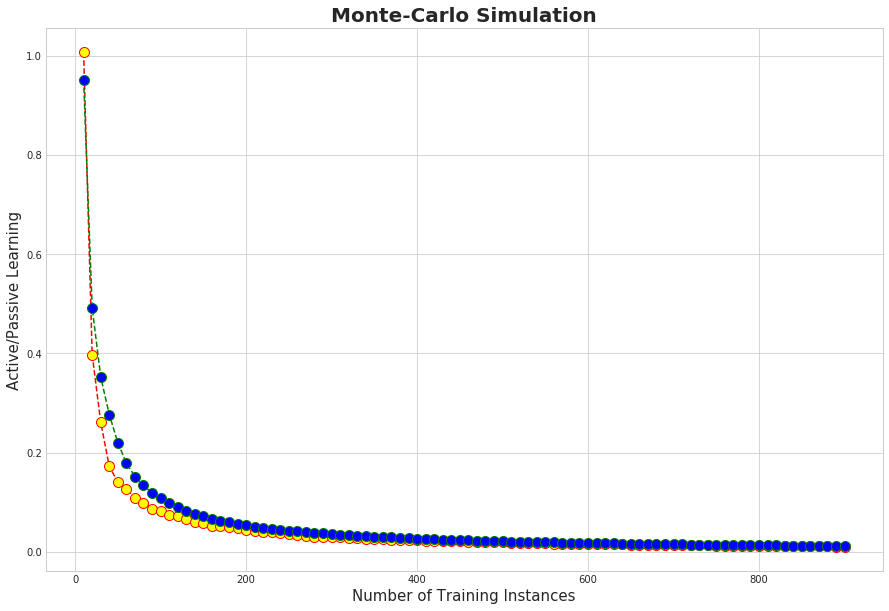

In [29]:
plt.figure(figsize=(15,10))
plt.title('Monte-Carlo Simulation', fontsize=20, fontweight='bold')
plt.xlabel('Number of Training Instances', fontsize=15)
plt.ylabel('Active/Passive Learning', fontsize=15)
sns.set_style("whitegrid")
plt.plot(range(10, 901,10), passive_res, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.plot(range(10, 901,10), active_res, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.show()